In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime

In [2]:
OptInfo = {}
OptInfo['Bounds Longitude']     = [230,360]
OptInfo['Bounds Latitude']      = [-80,-40]
OptInfo['Grid Spacing (dx,dy)'] = [5,2.5]
OptInfo['Start Time']           = '2017-05-01'
OptInfo['End Time']             = '2017-06-01'
OptInfo['WayPoints']            = pd.read_csv('../../resources/WayPoints_TestExample.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None

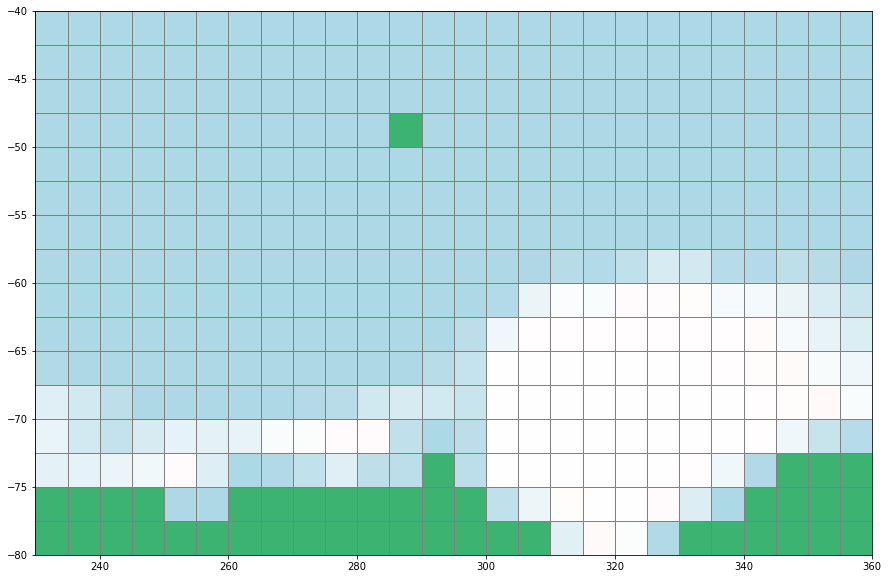

In [8]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(OptInfo)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(0)
cellGrid.plot()

In [9]:
TT = TravelTime(cellGrid)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = ArgentineSea ===
=== Processing Waypoint = MargueriteBay ===


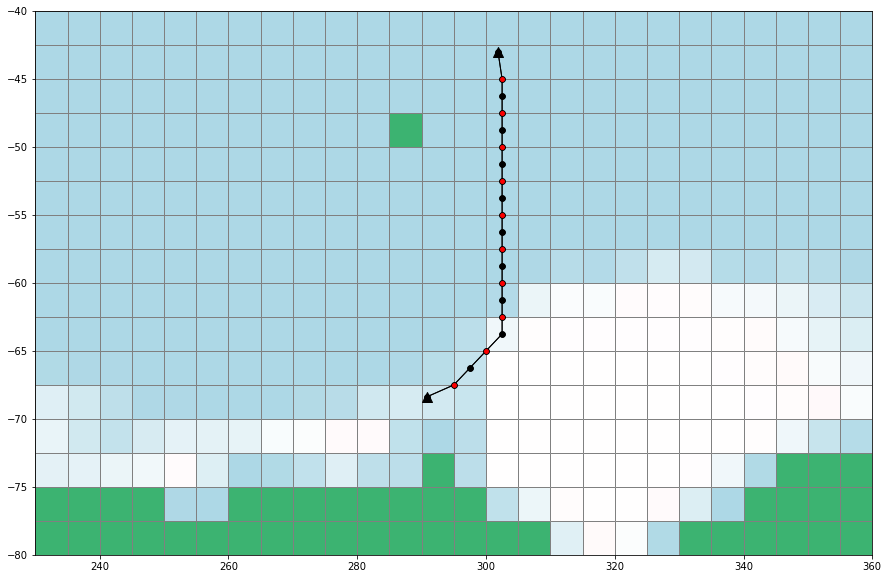

In [10]:
ax = TT.PlotPaths(routepoints=True)
Cps = TT.Paths[0]['Path']['CrossingPoints']
ax.scatter(Cps[:,0],Cps[:,1],15,'r',zorder=200)

In [11]:
TT.PathSmoothing(maxiter=150)

 PATH: ArgentineSea -> MargueriteBay 
Sp=(301.8661111111111,-43.0);Cp=(302.5,-45.0);Np=(302.5,-47.5)
Box1=(-44.0,302.18305555555554);Box2=(-46.25,302.5)
Sp=(302.14784091807013,-45.0);Cp=(302.5,-47.5);Np=(302.5,-50.0)
Box1=(-46.25,302.3239204590351);Box2=(-48.75,302.5)
Sp=(302.32392645240736,-47.5);Cp=(302.5,-50.0);Np=(302.5,-52.5)
Box1=(-48.75,302.4119632262037);Box2=(-51.25,302.5)
Sp=(302.411967212325,-50.0);Cp=(302.5,-52.5);Np=(302.5,-55.0)
Box1=(-51.25,302.4559836061625);Box2=(-53.75,302.5)
Sp=(302.45599655396103,-52.5);Cp=(302.5,-55.0);Np=(302.5,-57.5)
Box1=(-53.75,302.47799827698054);Box2=(-56.25,302.5)
Sp=(302.4766629267223,-55.0);Cp=(302.5,-57.5);Np=(302.5,-60.0)
Box1=(-56.25,302.4883314633612);Box2=(-58.75,302.5)
Sp=(302.48910573349616,-57.5);Cp=(302.5,-60.0);Np=(302.5,-62.5)
Box1=(-58.75,302.4945528667481);Box2=(-61.25,302.5)
Sp=(302.49507574098334,-60.0);Cp=(302.5,-62.5);Np=(300.0,-65.0)
Box1=(-61.25,302.49753787049167);Box2=(-63.75,301.25)
Sp=(301.24745353764473,-62.5);Cp=(3

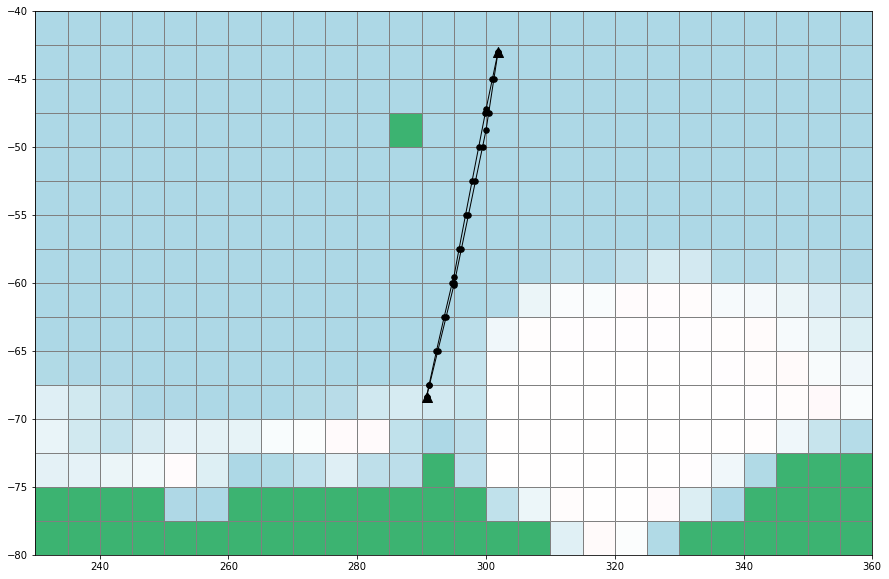

In [12]:
ax = TT.PlotPaths(routepoints=True)

In [ ]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature

PATH1 =  TT.Paths[0]['Path']['FullPath']

fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)
# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines(color='k')


for ii in range(len(TT.Paths)):
    PATH1 =  TT.Paths[ii]['Path']['FullPath']

    ax1.plot(PATH1[:,0]-360,PATH1[:,1],'r',transform=ccrs.PlateCarree())
    for ii, wpt in OptInfo['WayPoints'].iterrows():
        ax1.scatter(wpt['Long']-360,wpt['Lat'],150,marker='^',color='r',transform=ccrs.PlateCarree())
        ax1.text(wpt['Long']-360,wpt['Lat'],wpt['Name'],transform=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)


In [ ]:
import numpy as np
Sp=(294.99994347550927,-65.0);Cp=(295.0,-65.00002225041493)

Cp=(300.0,-52.50230500500922);Np=(299.99948531817694,-52.5)

((np.array(Np)-np.array(Cp))**2).sum()